
# PRT565 – Assessment 2  
### Machine Learning & Artificial Intelligence  
**Project:** Mental Health in Tech – OSMI Survey (2016–2022)  
**Student:** Surat Adhikari (s376778)  | Master of Data Science


## 1. Problem Description  

Mental health in the tech sector is an important issue. The Open Sourcing Mental Illness (OSMI) survey collects data on how people in tech experience mental health challenges.  

**Goal:** build a machine learning model to predict whether a person has sought treatment (`treatment` column) based on demographics and workplace factors.  

This helps me practice:  
- Cleaning and merging messy, multi-year survey data.  
- Training different models (Logistic Regression, Decision Tree, Random Forest).  
- Evaluating and comparing results using metrics and visuals.  



## 2. Dataset Description  

I used survey data from **2016–2022** (OSMI Mental Health in Tech survey).  
Because questions changed slightly each year, I had to:  
- Standardise column names.  
- Convert Yes/No answers to 1/0.  
- Group gender values into *Male*, *Female*, *Other*.  
- Remove outlier ages (<15 or >100).  

After cleaning, I combined all years into one dataset for modelling.  


# Mental Health in the Technology Industry

About 20% of adults struggle with mental health conditions like ADHD, bipolar disorder, anxiety, or depression. People who are most at risk for mental health issues need to be supported and not left behind in the tech sector, which is marked by a high-stress work environment, long hours, constant availability expectations, and a blending of personal and professional life because of open-source commitments. This can be accomplished by encouraging work-life balance, de-stigmatizing mental health discussions, implementing proactive mental health initiatives, and providing tech workers who are struggling with these issues with support and resources.

# Goal

The purpose of this notebook is to shed light on the mental health situation in the sector between 2014 and 2023 and offer suggestions for a more sustainable and healthy future.

The information provided here comes from Open Source Mental Illness (OSMI) surveys that were carried out from 2014 to 2023. The purpose of these surveys was to assess how people view mental health and the frequency of mental health conditions in the tech sector.

## Problem Description

 to look into the relationships between mental health issues and organisational, social, occupational, and demographic factors.  In light of this, the objective is to create a predictive model that can determine if an individual may require medical assistance.

 ## Justification for Relevance

 Research shows that a person's mental health has a direct effect on how well they perform at work (Paul, M., & Das, S. (2023)).  Furthermore, a database containing hundreds of records gathered from surveys of employees in the technology sector was released by an organisation named Open Sourcing Mental Health (OSMI).  Respondents to this survey provided details about their workplace.  For instance, details regarding the number of reported employees, gender, company benefits, and whether the individual had previously sought medical attention were reported.

 Along with the importance of mental health in the workplace, this database creates the primary driving force behind the advancement of this study.

 ## Suggested Resolution

 The study will be viewed as a classification problem in which it will be determined whether or not a person needs medical assistance based on data gathered from the survey.
 Based on a limited analysis of the data, it was initially determined that the variable to predict would be "treatment" because it indicates whether a person has sought medical attention in the past.  However, it should be noted that this study is merely an approach to the phenomenon under study, with no intention of proving its causality, due to the subjective nature of this self-reported variable (since an individual with mental health issues might not be aware of their illness).


 ## Citations
 Das, S., and Paul, M. (2023).  An analysis of mental health in the tech industry.  10(1), 221-233, International Journal of Science and Research Archive.

In [38]:

%pip install pandas numpy scikit-learn matplotlib seaborn shap imbalanced-learn plotly catboost xgboost lightgbm
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import plotly.io as pio

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV


from sklearn.ensemble import (
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    RandomForestClassifier,
    HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from catboost import CatBoost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score


from scipy.stats import shapiro

pd.set_option("display.max_columns", None)


pio.templates.default = "none"

Note: you may need to restart the kernel to use updated packages.


## Data Collection

I collected individual survey data files from OSMI for the years 2016 through 2023. These surveys contain responses from tech workers around the world regarding mental health history, treatment, and workplace support.


In [39]:

df_2016 = pd.read_csv("data/survey_2016.csv")
df_2017 = pd.read_csv("data/survey_2017.csv")
df_2018 = pd.read_csv("data/survey_2018.csv")
df_2019 = pd.read_csv("data/survey_2019.csv")
df_2020 = pd.read_csv("data/survey_2020.csv")
df_2021 = pd.read_csv("data/survey_2021.csv")
df_2022 = pd.read_csv("data/survey_2022.csv")
df_2023 = pd.read_csv("data/survey_2023.csv")
df_2024 = pd.read_csv("data/survey_2024.csv")


## Understanding the Columns

| Column Name               | Question                                                                                   |
|--------------------------|--------------------------------------------------------------------------------------------|
| Timestamp                | Timestamp                                                                                 |
| Age                      | Age                                                                                        |
| Gender                   | Gender                                                                                     |
| Country                  | Country                                                                                    |
| state                    | If you live in the United States, which state or territory do you live in?                |a
| self_employed            | Are you self-employed?                                                                     |
| family_history           | Do you have a family history of mental illness?                                            |
| treatment                | Have you sought treatment for a mental health condition?                                   |
| work_interfere           | If you have a mental health condition, do you feel that it interferes with your work?      |
| no_employees             | How many employees does your company or organization have?                                 |
| remote_work              | Do you work remotely (outside of an office) at least 50% of the time?                      |
| tech_company             | Is your employer primarily a tech company/organization?                                    |
| benefits                 | Does your employer provide mental health benefits?                                         |
| care_options             | Do you know the options for mental health care your employer provides?                     |
| wellness_program         | Has your employer ever discussed mental health as part of an employee wellness program?    |
| seek_help                | Does your employer provide resources to learn more about mental health issues and how to seek help? |
| anonymity                | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? |
| leave                    | How easy is it for you to take medical leave for a mental health condition?                |
| mental_health_consequence| Do you think that discussing a mental health issue with your employer would have negative consequences? |
| phys_health_consequence  | Do you think that discussing a physical health issue with your employer would have negative consequences? |
| coworkers                | Would you be willing to discuss a mental health issue with your coworkers?                 |
| supervisor               | Would you be willing to discuss a mental health issue with your direct supervisor(s)?      |
| mental_health_interview  | Would you bring up a mental health issue with a potential employer in an interview?        |
| phys_health_interview    | Would you bring up a physical health issue with a potential employer in an interview?      |
| mental_vs_physical       | Do you feel that your employer takes mental health as seriously as physical health?        |
| obs_consequence          | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? |
| comments                 | Any additional notes or comments                                                           |


In [40]:

print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)
print(df_2020.shape)
print(df_2021.shape)
print(df_2022.shape)
print(df_2023.shape)

(1259, 27)
(756, 123)
(417, 123)
(352, 82)
(180, 120)
(131, 124)
(164, 126)
(6, 126)


In [41]:

df_2016.head()
df_2017.head()
df_2018.head()
df_2019.head()
df_2020.head()
df_2021.head()
df_2022.head()
df_2023.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

## Data Cleaning & Preprocessing

We merged the datasets from multiple years into a single dataframe and standardized column names. This step also included:
- Handling missing values
- Standardizing responses for key columns (e.g., gender, country)
- Removing invalid ages
- Creating consistent categorical features across years



In [42]:
column_mapping = {
    # -------- 2014 --------
    'Age': 'age',
    'Gender': 'gender',
    'Country': 'country',
    'self_employed': 'self_employed',
    'family_history': 'family_history',
    'treatment': 'treatment',
    'work_interfere': 'work_interfere',
    'no_employees': 'no_employees',
    'tech_company': 'tech_company',
    'benefits': 'benefits',
    'care_options': 'care_options',
    'wellness_program': 'wellness_program',
    'seek_help': 'seek_help',
    'anonymity': 'anonymity',
    'leave': 'leave',
    
    # -------- 2016 --------
    'Do you work remotely?':'remote_work',
    'What US state or territory do you live in?':'state',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you live in?': 'country',
    'Are you self-employed?': 'self_employed',
    'Do you have a family history of mental illness?': 'family_history',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'treatment',
    'How many employees does your company or organization have?': 'no_employees',
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'care_options',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_program',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'seek_help',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'leave',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'work_interfere',

    # -------- 2017+ --------
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'What US state or territory do you <strong>live</strong> in?':'state',
    '<strong>Are you self-employed?</strong>': 'self_employed',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?':'anonymity',
    'Have you ever sought treatment for a mental health disorder from a mental health professional?': 'treatment',
    'Do you know the options for mental health care available under your employer-provided health coverage?': 'care_options',
    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'seek_help',
    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?': 'leave',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?': 'work_interfere',

    # -------- 2018+ --------
    'What country do you <strong>work</strong> in?': 'country',

    # -------- 2019 - 2023 variations --------
    'What US state or territory do you *live* in?':'state',
    'What country do you *live* in?':'country',
    '*Are you self-employed?*': 'self_employed',
    'Do you have a family history of mental illness?': 'family_history',
    'Have you ever been diagnosed with a mental health condition by a medical professional?': 'treatment',
    'How many people are employed at your company?': 'no_employees',
    'Is your company primarily a tech company?': 'tech_company',
    'Does your employer provide mental health benefits?': 'benefits',
    'Are you aware of the mental health options your employer provides?': 'care_options',
    'Does your employer discuss mental health in the workplace?': 'wellness_program',
    'Does your employer offer mental health resources?': 'seek_help',
    'Is your anonymity protected when using mental health resources?': 'anonymity',
    'How easy is it to take medical leave for mental health?': 'leave',
    'How does your mental health interfere with your work?': 'work_interfere',
    'Would you be willing to discuss a mental health issue with your coworkers?':'coworkers',
    'how much importance does your employer place on mental health?':'mental_health_consequence',
    'how much importance does your employer place on physical health?':'phys_health_consequence',
    'Would you feel comfortable discussing a mental health issue with your direct supervisor?':'supervisor',
    'Would you bring up your mental health with a potential employer in an interview?':'mental_health_interview',
    'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?':'mental_vs_physical'
}

In [43]:
def clean_and_standardize(df, year, mapping, target_columns):
    df = df.rename(columns={k: v for k, v in mapping.items() if k in df.columns})
    df['survey_year'] = year
    available_cols = [col for col in target_columns if col in df.columns]
    return df[available_cols + ['survey_year']]

In [44]:
target_columns = [    
    'age', 'gender', 'country', 'state', 'self_employed', 'family_history',
     'treatment', 'work_interfere', 'no_employees', 'remote_work','tech_company', 'benefits', 'care_options', 'wellness_program',
     'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
     'phys_health_consequence', 'coworkers', 'supervisor',
     'mental_vs_physical', 'obs_consequence', 'comments'
]

In [45]:

df_2016_cleaned = clean_and_standardize(df_2016, 2016, column_mapping, target_columns)
df_2017_cleaned = clean_and_standardize(df_2017, 2017, column_mapping, target_columns)
df_2018_cleaned = clean_and_standardize(df_2018, 2018, column_mapping, target_columns)
df_2019_cleaned = clean_and_standardize(df_2019, 2019, column_mapping, target_columns)
df_2020_cleaned = clean_and_standardize(df_2020, 2020, column_mapping, target_columns)
df_2021_cleaned = clean_and_standardize(df_2021, 2021, column_mapping, target_columns)
df_2022_cleaned = clean_and_standardize(df_2022, 2022, column_mapping, target_columns)
df_2023_cleaned = clean_and_standardize(df_2023, 2023, column_mapping, target_columns)

In [46]:
df_2016_cleaned

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence,comments,survey_year
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,Yes,No,NaN,2016
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know,No,NaN,2016
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,No,No,NaN,2016
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,No,Yes,NaN,2016
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Don't know,No,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,Don't know,No,NaN,2016
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,Yes,No,NaN,2016
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,NaN,2016
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,NaN,2016


In [47]:
for i, df in zip([ 2016, 2017, 2018, 2019,2020, 2021, 2022, 2023],
                 [ df_2016_cleaned, df_2017_cleaned, df_2018_cleaned, df_2019_cleaned, df_2020_cleaned, df_2021_cleaned, df_2022_cleaned, df_2023_cleaned]):
    missing = set(target_columns) - set(df.columns)
    print(f"Year {i} missing columns: {missing}")

Year 2016 missing columns: set()
Year 2017 missing columns: {'obs_consequence', 'comments', 'supervisor', 'remote_work', 'benefits', 'phys_health_consequence', 'coworkers', 'mental_health_consequence'}
Year 2018 missing columns: {'obs_consequence', 'comments', 'supervisor', 'remote_work', 'phys_health_consequence', 'coworkers', 'mental_health_consequence'}
Year 2019 missing columns: {'obs_consequence', 'comments', 'supervisor', 'remote_work', 'phys_health_consequence', 'coworkers', 'mental_health_consequence'}
Year 2020 missing columns: {'obs_consequence', 'comments', 'supervisor', 'remote_work', 'phys_health_consequence', 'coworkers', 'mental_health_consequence'}
Year 2021 missing columns: {'obs_consequence', 'comments', 'supervisor', 'remote_work', 'phys_health_consequence', 'coworkers', 'mental_health_consequence'}
Year 2022 missing columns: {'obs_consequence', 'comments', 'supervisor', 'remote_work', 'phys_health_consequence', 'coworkers', 'mental_health_consequence'}
Year 2023 mis

In [48]:
merged_df_all_years = pd.concat([

    df_2016_cleaned,
    df_2017_cleaned,
    df_2018_cleaned,
    df_2019_cleaned,
    df_2020_cleaned,
    df_2021_cleaned,
    df_2022_cleaned,
    df_2023_cleaned
    ], ignore_index=True)


print("Final merged shape:", merged_df_all_years.shape)
merged_df_all_years.tail()

Final merged shape: (3265, 25)


,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence,comments,survey_year
3260,36.0,Male,United States of America,Indiana,0,No,1,No,6-25,NaN,1.0,I don't know,No,No,I don't know,I don't know,I don't know,NaN,NaN,NaN,NaN,Physical health,NaN,NaN,2023
3261,44.0,male,United States of America,Maryland,1,Yes,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
3262,53.0,Female,United States of America,Indiana,0,Yes,1,Maybe,500-1000,NaN,0.0,Yes,Yes,Yes,No,I don't know,Neither easy nor difficult,NaN,NaN,NaN,NaN,Same level of comfort for each,NaN,NaN,2023
3263,62.0,male,United States of America,Ohio,1,No,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
3264,39.0,Male,Canada,NaN,0,Yes,1,No,More than 1000,NaN,1.0,I don't know,No,Yes,I don't know,Yes,Somewhat easy,NaN,NaN,NaN,NaN,Mental health,NaN,NaN,2023


In [49]:
round(merged_df_all_years.describe(include='all'),2)

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence,comments,survey_year
count,3.263000e+03,3234,3263,1939,3247.0,3265,3265.0,2700,2964,1259,2964.0,2321,2790,2964,2964,2964,2964,1259,1259,1259,1259,2964,1259,164,3265.00
unique,NaN,147,89,91,4.0,3,4.0,7,6,2,4.0,5,3,4,4,4,8,3,3,3,3,6,2,160,NaN
top,NaN,Male,United States of America,Illinois,0.0,No,1.0,Yes,More than 1000,No,1.0,Yes,No,No,No,I don't know,Somewhat easy,No,No,Some of them,Yes,Physical health,No,* Small family business - YMMV.,NaN
freq,NaN,1442,1204,146,1705.0,1448,1165.0,633,808,883,1232.0,1040,1317,1850,1374,1014,723,490,925,774,516,1148,1075,5,NaN
mean,3.064668e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.55
std,1.750618e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.76
min,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.00
25%,2.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.00
50%,3.300000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.00
75%,3.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.00


- Over a million years of age and negative age Cleaning up this mess is imperative.
- Gender: The gender column needs to be cleaned up because it contains an excessive number of categories.

In [50]:
merged_df_all_years.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3263 non-null   float64
 1   gender                     3234 non-null   object 
 2   country                    3263 non-null   object 
 3   state                      1939 non-null   object 
 4   self_employed              3247 non-null   object 
 5   family_history             3265 non-null   object 
 6   treatment                  3265 non-null   object 
 7   work_interfere             2700 non-null   object 
 8   no_employees               2964 non-null   object 
 9   remote_work                1259 non-null   object 
 10  tech_company               2964 non-null   object 
 11  benefits                   2321 non-null   object 
 12  care_options               2790 non-null   object 
 13  wellness_program           2964 non-null   objec

In [51]:
merged_df_all_years.dtypes

age                          float64
gender                        object
country                       object
state                         object
self_employed                 object
family_history                object
treatment                     object
work_interfere                object
no_employees                  object
remote_work                   object
tech_company                  object
benefits                      object
care_options                  object
wellness_program              object
seek_help                     object
anonymity                     object
leave                         object
mental_health_consequence     object
phys_health_consequence       object
coworkers                     object
supervisor                    object
mental_vs_physical            object
obs_consequence               object
comments                      object
survey_year                    int64
dtype: object

In [52]:
merged_df_all_years.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,comments,3101
1,coworkers,2006
2,supervisor,2006
3,phys_health_consequence,2006
4,obs_consequence,2006
5,mental_health_consequence,2006
6,remote_work,2006
7,state,1326
8,benefits,944
9,work_interfere,565


In [53]:
x=round((merged_df_all_years.isna().sum()/merged_df_all_years.shape[0])*100,2)
x.reset_index()

,index,0
0,age,0.06
1,gender,0.95
2,country,0.06
3,state,40.61
4,self_employed,0.55
5,family_history,0.00
6,treatment,0.00
7,work_interfere,17.30
8,no_employees,9.22
9,remote_work,61.44


- Comments column has almost 96% null values. It can be understood as it is not a mandatory question to answer in survey.We can safely drop this column.
- For Work_interfere and self_employed , we need to consider treating these columns.
>>>
>>>
>>>
- Null values are observed. Most come from the State column which does not contribute to the research.
- In the same sense, the Timestamp and comments columns are discarded.

In [54]:
merged_df_all_years['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME', 'Missouri', 'Washington', 'Illinois', 'California',
       'Georgia', 'Pennsylvania', 'Tennessee', 'Louisiana', 'Ohio',
       'Oregon', 'New York', 'Minnesota', 'Kansas', 'Colorado',
       'Virginia', 'Wisconsin', 'Maryland', 'Montana', 'Utah', 'Texas',
       'New Mexico', 'North Carolina', 'Arizona', 'District of Columbia',
       'Massachusetts', 'Idaho', 'New Jersey', 'Alabama', 'Alaska',
       'Michigan', 'Indiana', 'Nebraska', 'North Dakota', 'Iowa',
       'South Dakota', 'South Carolina', 'Kentucky', 'Nevada', 'Florida',
       'New Hampshire', 'Maine', 'Connecticut', 'Rhode Island', 'Wyoming',
       'Vermont', 'Oklahoma'], dtype=object)

In [55]:
df['country'].value_counts()

country
United States of America    5
Canada                      1
Name: count, dtype: int64

- More than 75% of people are from US. It is not that more people from US are suffering from mental health problems, the survey is taken up mostly by the us people. There are very few people who took part in survey from other countries.

In [56]:
merged_df_all_years = merged_df_all_years.drop(["comments",'coworkers','supervisor','supervisor','phys_health_consequence','obs_consequence','mental_health_consequence','remote_work','state','mental_vs_physical'], axis=1)


In [57]:
import pandas as pd

# Function to observe unique categorical values for each variable.
def ver_categorias_unicas(df):
    """
    Prints the unique categories of each categorical variable in the DataFrame.
    """
    for col in merged_df_all_years.select_dtypes(include=['object', 'category']).columns:
        print(f"--- {col} ---")
        print(merged_df_all_years[col].unique())
        print()
        print("------------------------------------------------------------------------------")

In [58]:
ver_categorias_unicas(merged_df_all_years)

--- gender ---
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means' nan
 'Genderfluid' 'Nonbinary' 'cis-male' 'male/androgynous '
 'cis hetero male' 'femalw' 'Male (cis)' 'uhhhhhhhhh fem genderqueer?'
 "male (hey this is the tech industry you're talking about)"
 'female (cis)' 'God King of the Valajar' 'Cis male' 'man'
 'My sex is female.' 'Cis-male' 'Non-binary' 'Male, cis' 'cis male '
 'Agender/genderfluid' 'sometimes' 'female (cisgender)' 'Female (cis) '
 'Woman-identified' 'Contextual' '

In [59]:
merged_df_all_years['gender'].value_counts().reset_index()

,gender,count
0,Male,1442
1,male,498
2,Female,419
3,female,224
4,M,190
...,...,...
142,Female (cis),1
143,female (cisgender),1
144,sometimes,1
145,Agender/genderfluid,1


In [60]:
male_keywords = ['mostly male', 'cisgender male','MAle', 'male/he/him','CIS Male','Cisgender male','Let\'s keep it simple and say "male"',
                 'Identify as male', 'Malel', 'dude', 'Ostensibly Male', 'male, born with xy chromosoms','Male, cis' ,'cis male ','Cis-male',
                 "male (hey this is the tech industry you're talking about)",'cis hetero male' ,'cis man' ,'MALE' ,'cis-male','mail', 'M|','male ' ,
                 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                 'Dude' ,'Male (cis)', 'Sex is male', 'Cis male', 'Male.', 'man', 'ostensibly male','Cis Man' ,'Malr', 'cis male', 'Mail', 
                 'Man','Make','Male (CIS)','Mal','Cis Male','Male','male', 'Male-ish', 'maile', 'm','M', 'man', 'cis male', 'cis man', 'male ',
                 'msle', 'malr', 'mal','maile', 'mail', 'make', 'guy', 'male leaning androgynous']

female_keywords = ['Femile' ,'FEMALE' ,'female, she/her','Female-identified' ,'cis woman','femmina','cisgender female' ,'Cisgendered woman',
                   'Female,cis-gendered','Female/gender non-binary.' ,'Cis woman', 'Female (cisgender)', 'Cis-Female','I identify as female' ,
                   '*shrug emoji* (F)', 'cis female' , 'F, cisgender' ,'Female-ish' ,'female (cisgender)' ,'Female (cis) ', 'Woman-identified',
                   'cis-Female','female (cis)','My sex is female.','femalw','Cis-woman' ,'Female (props for making this a freeform field, though)' ,
                   ' Female','fem','Cisgender Female','female/woman', 'fm' ,'Cis female ','I identify as female.','female ','Female assigned at birth ',
                   'femail', 'Female (cis)','Femake','Woman','Cis Female' ,'F','Female','female', 'f', 'woman', 'femake', 'femail', 'cis female',
                   'cis-female', 'female ', 'cis female/femme', 'female (cis)']

In [61]:
def clasificar_genero(valor):
   
    val_norm = str(valor).strip().lower()
    
    if any(kw in val_norm for kw in female_keywords):
        return 'Female'
    elif any(kw in val_norm for kw in male_keywords):
        return 'Male'
    else:
        return 'Other'


In [62]:
merged_df_all_years['gender'] = merged_df_all_years['gender'].apply(clasificar_genero)

In [63]:
merged_df_all_years['gender'].value_counts().reset_index()

,gender,count
0,Male,2315
1,Female,871
2,Other,79


In [64]:
ver_categorias_unicas(merged_df_all_years)

--- gender ---
['Female' 'Male' 'Other']

------------------------------------------------------------------------------
--- country ---
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines'
 'United States of America' 'Bangladesh' 'Iceland' 'Indonesia' 'Pakistan'
 'Serbia' 'Jordan' 'Argentina' 'Eritrea' 'Swaziland' 'Ukraine' 'Slovakia'
 'Luxembourg' 'Turkey' nan 'Estonia' 'Mauritius' 'Saudi Arabia' 'Kenya'
 'Ethiopia' 'Macedonia' 'Hong Kong' 'Ghana' 'Algeria' 'Afghanistan'
 'Mongolia' 'Cameroon' 'Sri Lanka'

In [65]:
merged_df_all_years.dropna(subset="self_employed", inplace=True)
merged_df_all_years['work_interfere'] = merged_df_all_years['work_interfere'].fillna('Unknown')

Records with null values will be removed in the case of the self_employed variable.
- - This is due to the possibility of bias resulting from the addition of a synthetic value to this variable.
- On the other hand, the value "Unknown" will be entered into the work_interfere variable.
- - Because it is possible to assume that users who did not reply did not know.

In [66]:
merged_df_all_years['age'].value_counts().reset_index()

,age,count
0,30.0,181
1,32.0,173
2,29.0,162
3,28.0,158
4,34.0,155
...,...,...
59,8.0,1
60,-1726.0,1
61,-29.0,1
62,329.0,1


In [67]:
merged_df_all_years = merged_df_all_years[(merged_df_all_years['age'] >= 18) & (merged_df_all_years['age'] <= 80)]

In [68]:
merged_df_all_years['age'].value_counts().reset_index()

,age,count
0,30.0,181
1,32.0,173
2,29.0,162
3,28.0,158
4,34.0,155
5,31.0,152
6,27.0,149
7,33.0,148
8,26.0,143
9,35.0,142


## Feature Engineering
- Creating `support_score` based on support-related columns
- Binning age into age groups

In [69]:
bins = [18, 25, 35, 45, 55, 65, 80]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_df_all_years['age_group'] = pd.cut(merged_df_all_years['age'], bins=bins, labels=labels, right=False)

In [70]:
merged_df_all_years['age_group'].value_counts().reset_index()

,age_group,count
0,25-34,1544
1,35-44,975
2,18-24,342
3,45-54,285
4,55-64,76
5,65+,9


In [71]:
merged_df_all_years.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,benefits,938
1,care_options,469
2,tech_company,295
3,leave,295
4,anonymity,295
5,seek_help,295
6,wellness_program,295
7,no_employees,295
8,survey_year,0
9,age,0


In [72]:
def clean_data(df):
 
    def clean_country(x):
        if pd.isna(x):
            return None
        x = str(x).strip().lower()
        if x in ['unknown', 'unk', 'n/a', 'na', '?', 'none']:
            return None
        return x.title()



    df['country'] = df['country'].apply(clean_country)
    df['no_employees'] = df['no_employees'].apply(clean_country)
    df['tech_company'] = df['tech_company'].apply(clean_country)
    df['seek_help'] = df['seek_help'].apply(clean_country)
    df['anonymity'] = df['anonymity'].apply(clean_country)

    df = df[df['country'].notna()]

    cat_cols = [
         'no_employees','tech_company', 'benefits', 'care_options',
        'wellness_program', 'seek_help', 'anonymity', 'leave'
    ]
    for col in cat_cols:
        if col in df.columns:
            df[col] = df[col].fillna("Unknown")


    

    df['self_employed_encoded'] = df['self_employed'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1] else 0)
    df['tech_company_encoded'] = df['tech_company'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1,1.0] else 0)


    df['benefits'] = df['benefits'].astype(str).str.strip().str.lower()
    df['has_benefits'] = df['benefits'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1] else 0)
    df['care_options'] = df['care_options'].astype(str).str.strip().str.lower()
    df['has_care_options'] = df['care_options'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1] else 0)
    df['wellness_program'] = df['wellness_program'].astype(str).str.strip().str.lower()
    df['has_wellness_program'] = df['wellness_program'].apply(lambda x: 1 if x in ['yes','Yes', 'True', 1] else 0)
    df['support_score'] = df['has_benefits'] + df['has_care_options'] + df['has_wellness_program']

    df['treatment'] = df['treatment'].astype(str).str.strip().str.lower()
    df['treatment_encoded'] = df['treatment'].apply(lambda x: 1 if x in ['Yes','yes', '1', 'true'] else 0)

    return df


In [73]:
cleaned_data = clean_data(merged_df_all_years)
cleaned_data

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,survey_year,age_group,self_employed_encoded,tech_company_encoded,has_benefits,has_care_options,has_wellness_program,support_score,treatment_encoded
18,46.0,Male,United States,Yes,Yes,no,Sometimes,1-5,Yes,yes,not sure,yes,Don'T Know,Yes,Very easy,2016,45-54,1,1,1,0,1,2,0
19,36.0,Male,France,Yes,Yes,no,Unknown,6-25,Yes,no,no,yes,No,Yes,Somewhat easy,2016,35-44,1,1,0,0,1,1,0
20,29.0,Male,United States,No,Yes,yes,Sometimes,100-500,Yes,yes,yes,no,No,No,Somewhat difficult,2016,25-34,0,1,1,1,0,2,1
21,31.0,Male,United States,Yes,No,no,Never,1-5,Yes,no,no,no,No,Yes,Somewhat difficult,2016,25-34,1,1,0,0,0,0,0
22,46.0,Male,United States,No,No,yes,Often,26-100,Yes,yes,yes,no,No,Don'T Know,Don't know,2016,45-54,0,1,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,36.0,Male,United States Of America,0,No,1,No,6-25,1.0,i don't know,no,no,I Don'T Know,I Don'T Know,I don't know,2023,35-44,0,0,0,0,0,0,1
3261,44.0,Male,United States Of America,1,Yes,1,Unknown,Unknown,Unknown,unknown,unknown,unknown,Unknown,Unknown,Unknown,2023,35-44,1,0,0,0,0,0,1
3262,53.0,Female,United States Of America,0,Yes,1,Maybe,500-1000,0.0,yes,yes,yes,No,I Don'T Know,Neither easy nor difficult,2023,45-54,0,0,1,1,1,3,1
3263,62.0,Male,United States Of America,1,No,1,Unknown,Unknown,Unknown,unknown,unknown,unknown,Unknown,Unknown,Unknown,2023,55-64,1,0,0,0,0,0,1


In [74]:
cleaned_data.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,age,0
1,gender,0
2,support_score,0
3,has_wellness_program,0
4,has_care_options,0
5,has_benefits,0
6,tech_company_encoded,0
7,self_employed_encoded,0
8,age_group,0
9,survey_year,0


In [75]:
for col in cleaned_data.select_dtypes(include=['object', 'category','float64', 'int64']).columns:
    print(f"--- {col} ---")
    print(cleaned_data[col].unique())
    print()
    print("------------------------------------------------------------------------------")

--- age ---
[46. 36. 29. 31. 41. 33. 35. 34. 37. 32. 30. 42. 40. 27. 38. 50. 24. 18.
 28. 26. 22. 44. 23. 19. 25. 39. 45. 21. 43. 56. 60. 54. 55. 48. 20. 57.
 58. 47. 62. 51. 65. 49. 53. 61. 72. 52. 66. 64. 59. 67. 63. 76.]

------------------------------------------------------------------------------
--- gender ---
['Male' 'Female' 'Other']

------------------------------------------------------------------------------
--- country ---
['United States' 'France' 'United Kingdom' 'Canada' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Bulgaria' 'Sweden' 'Colombia' 'Latvia' 'Romania'
 'Belgium' 'New Zealand' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia And Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Greece' 'Moldova' 'Georgia'
 'China' 'Czech Republic' 'Philippines' 'United States Of America'
 'Bangladesh' 'Ic

## Exploratory Data Analysis (EDA)

We explore demographic distributions, treatment history, support options, and changes over time. Visualizations below help uncover patterns across years and regions.


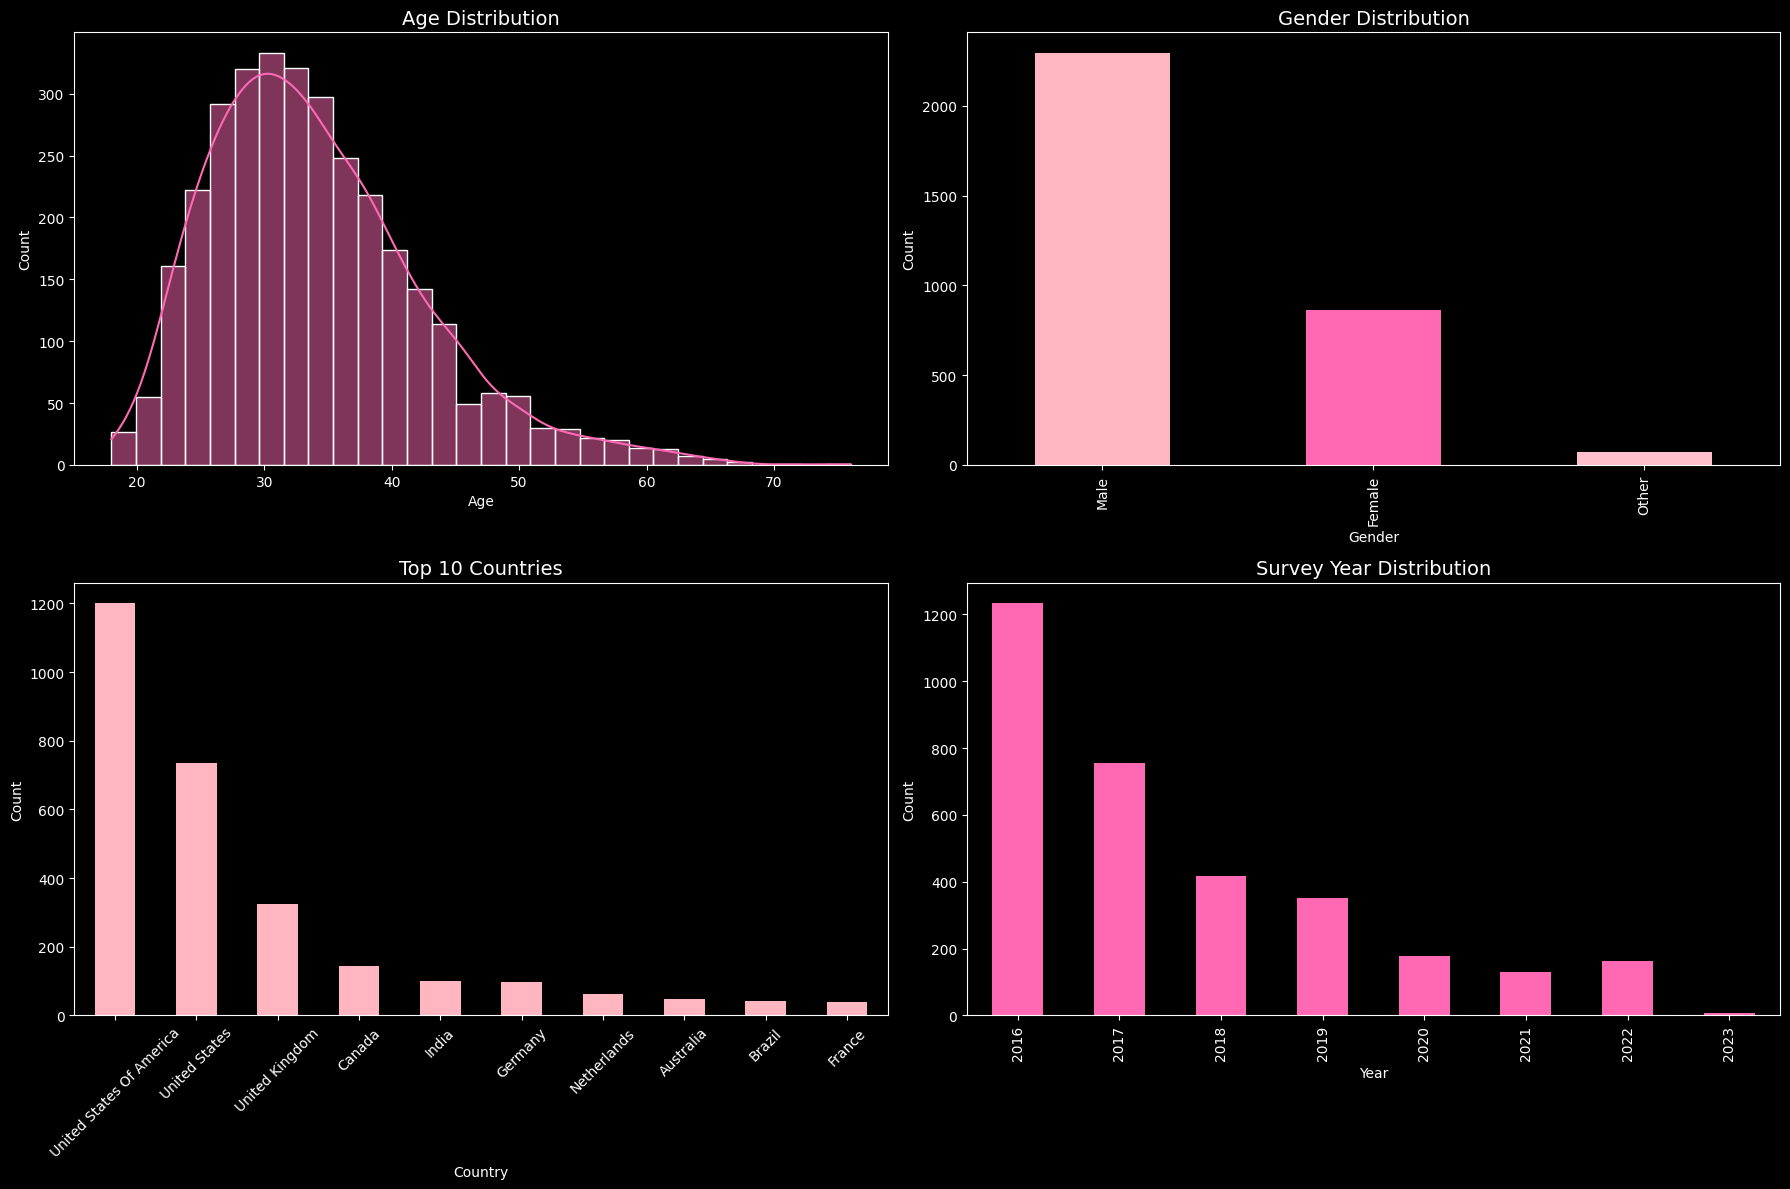

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_demographics(df):
    sns.set_palette(["#ffb6c1", "#ffc0cb", "#ff69b4", "#ff1493"])  # pink shades
    plt.figure(figsize=(18, 12))
    
    # Age distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df['age'], bins=30, kde=True, color="#ff69b4")
    plt.title('Age Distribution', fontsize=14)
    plt.xlabel('Age')
    plt.ylabel('Count')
    
    # Gender distribution
    plt.subplot(2, 2, 2)
    df['gender'].value_counts().plot(kind='bar', color=["#ffb6c1", "#ff69b4", "#ffc0cb"])
    plt.title('Gender Distribution', fontsize=14)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    
    # Top 10 countries
    plt.subplot(2, 2, 3)
    df['country'].value_counts().nlargest(10).plot(kind='bar', color="#ffb6c1")
    plt.title('Top 10 Countries', fontsize=14)
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Survey year distribution
    plt.subplot(2, 2, 4)
    df['survey_year'].value_counts().sort_index().plot(kind='bar', color="#ff69b4")
    plt.title('Survey Year Distribution', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

plot_demographics(cleaned_data)
